In [1]:
import os



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
challenger=pd.read_csv("/Users/vijayakumarrajaram/Desktop/NT/A4/abalone.csv")


In [4]:
challenger


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
challenger.dtypes


Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [7]:
# univariate analysis


In [6]:
import seaborn as sns
sns.countplot(challenger.Sex)


ValueError: could not convert string to float: 'M'

In [7]:
# Bi-variate analysis


In [8]:
rings=challenger['Rings']


In [9]:
whole_weight=challenger['Whole weight']


Text(0.5, 0, 'Whole weight')

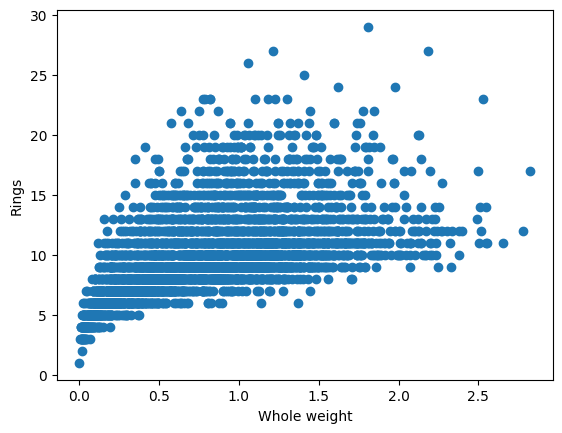

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(whole_weight,rings,'o')
plt.ylabel('Rings')
plt.xlabel('Whole weight')


In [16]:
# Multi-variate analysis


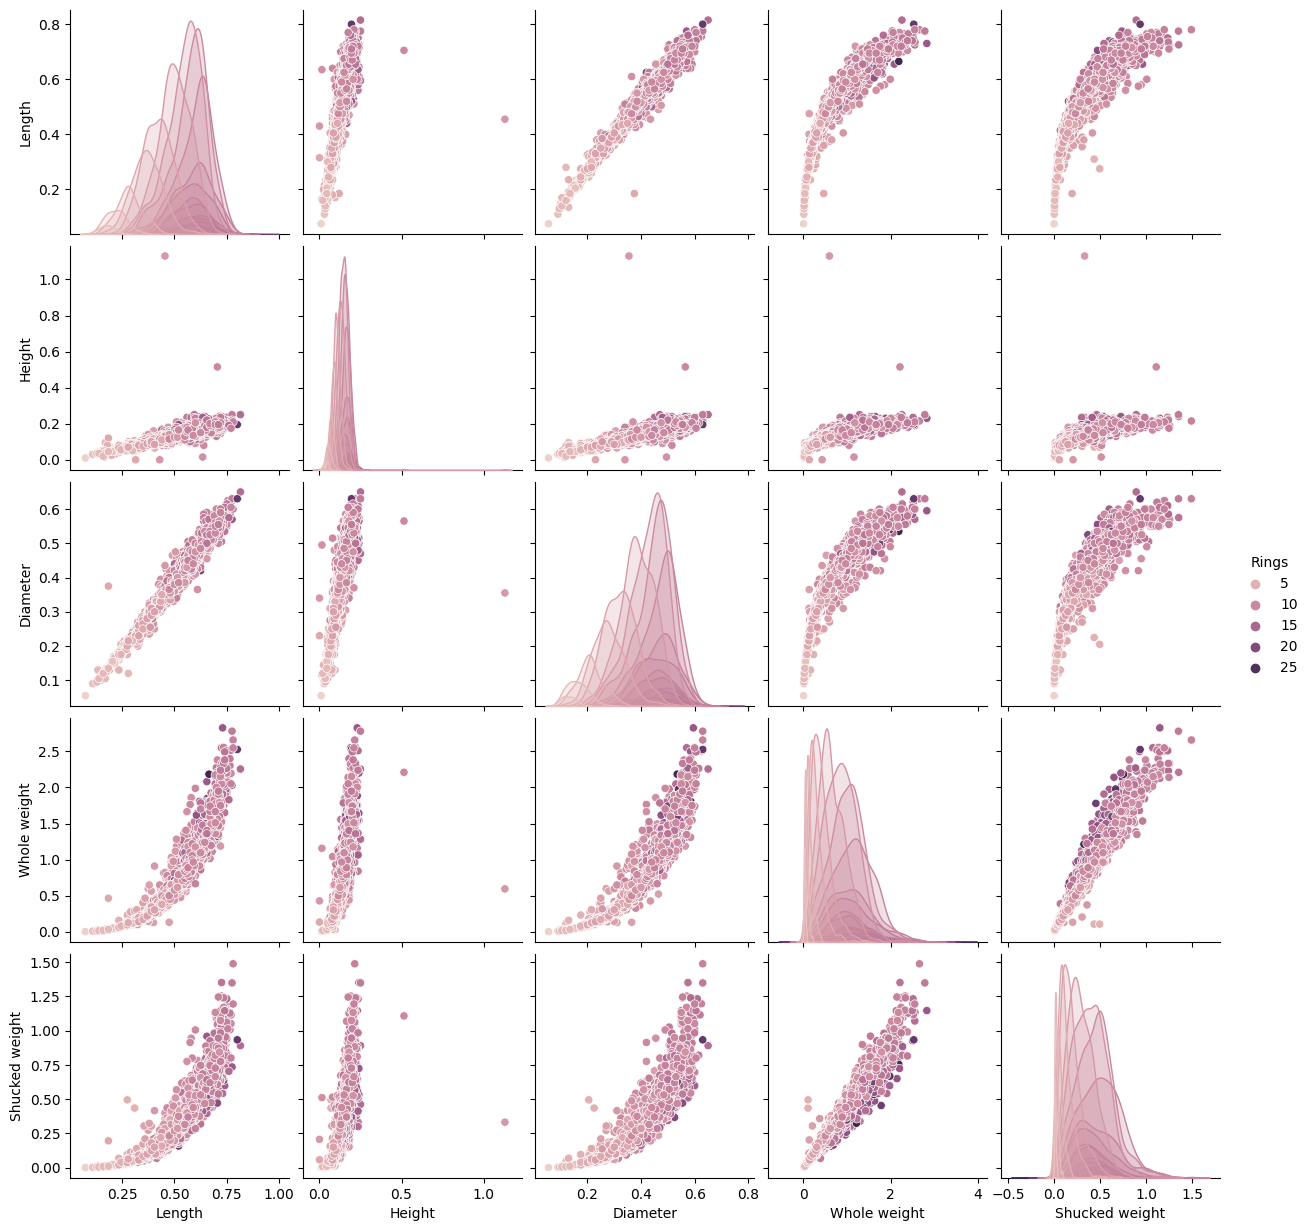

In [17]:
import seaborn as sns
sns.pairplot(data=challenger[['Length','Height','Diameter','Whole weight','Shucked weight','Rings']],hue='Rings')


In [11]:
# descriptive statistics


In [12]:
corr=challenger.corr()
corr


/var/folders/lk/gtqzxv754ql3c_vm0dmsy23m0000gn/T/ipykernel_5940/136588094.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=challenger.corr()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot: >

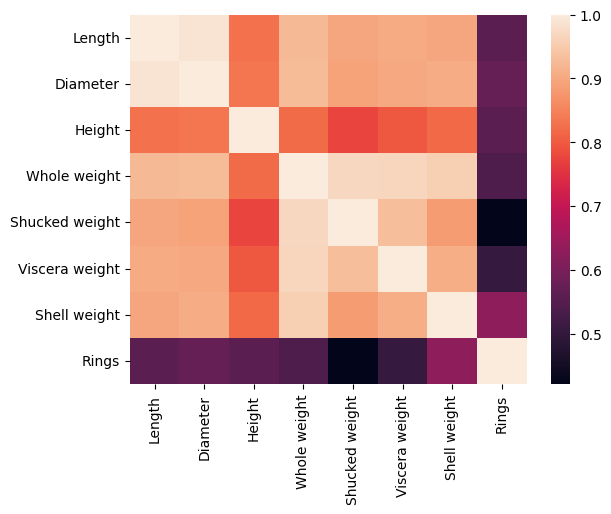

In [13]:
# heatmap for correlation
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)


In [14]:
# finding mean
mean_rings=challenger['Rings'].mean()
mean_rings


9.933684462532918

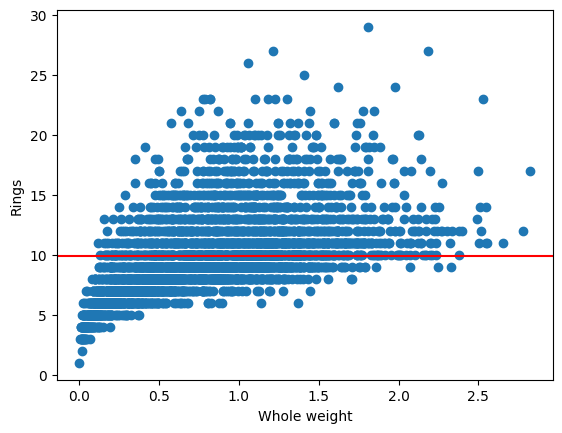

In [15]:
plt.plot(whole_weight,rings,'o')
plt.ylabel('Rings')
plt.xlabel('Whole weight')
plt.axhline(mean_rings,color='red',linestyle='-')
plt.show()


In [16]:
# Obtaining Ordinary Least Square Regression Model
import statsmodels.api as sm
model=sm.OLS(rings,whole_weight).fit()


In [17]:
#Obtain model summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Rings   R-squared (uncentered):                   0.816
Model:                            OLS   Adj. R-squared (uncentered):              0.816
Method:                 Least Squares   F-statistic:                          1.857e+04
Date:                Tue, 01 Nov 2022   Prob (F-statistic):                        0.00
Time:                        20:08:03   Log-Likelihood:                         -12186.
No. Observations:                4177   AIC:                                  2.437e+04
Df Residuals:                    4176   BIC:                                  2.438e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Whole weight     9.7997      0.072    136.274      0.000       9.659       9.941
==============================================================================
Omnibus:                      159.767   Durbin-Watson:                   0.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.564
Skew:                          -0.409   Prob(JB):                     8.47e-46
Kurtosis:                       3.725   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#Checking for missing values
challenger.isnull()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [19]:
# Checking outliers with InterQuartile Range(IQR)
Q1 = challenger.quantile(0.25)
Q3 = challenger.quantile(0.75)
IQR = Q3 - Q1
print(challenger < (Q1 - 1.5 * IQR)) |(challenger > (Q3 + 1.5 * IQR))


/var/folders/lk/gtqzxv754ql3c_vm0dmsy23m0000gn/T/ipykernel_5940/306025567.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = challenger.quantile(0.25)
/var/folders/lk/gtqzxv754ql3c_vm0dmsy23m0000gn/T/ipykernel_5940/306025567.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = challenger.quantile(0.75)
/var/folders/lk/gtqzxv754ql3c_vm0dmsy23m0000gn/T/ipykernel_5940/306025567.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(challenger < (Q1 - 1.5 * IQ

      Diameter  Height  Length  Rings    Sex  Shell weight  Shucked weight  \
0        False   False   False  False  False         False           False   
1        False   False   False  False  False         False           False   
2        False   False   False  False  False         False           False   
3        False   False   False  False  False         False           False   
4        False   False   False  False  False         False           False   
...        ...     ...     ...    ...    ...           ...             ...   
4172     False   False   False  False  False         False           False   
4173     False   False   False  False  False         False           False   
4174     False   False   False  False  False         False           False   
4175     False   False   False  False  False         False           False   
4176     False   False   False  False  False         False           False   

      Viscera weight  Whole weight  
0              False      

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [20]:
# Categorical column encoding
cleanup_nums ={"Sex":{"M":0,"F":1,"I":2}}
challenger = challenger.replace(cleanup_nums)
challenger.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [21]:
# Split the data into dependent and independent variables 
X= challenger.iloc[ : , :-1].values
y= challenger.iloc[ : ,[8]].values


In [22]:
X


array([[0.    , 0.455 , 0.365 , ..., 0.2245, 0.101 , 0.15  ],
       [0.    , 0.35  , 0.265 , ..., 0.0995, 0.0485, 0.07  ],
       [1.    , 0.53  , 0.42  , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.    , 0.6   , 0.475 , ..., 0.5255, 0.2875, 0.308 ],
       [1.    , 0.625 , 0.485 , ..., 0.531 , 0.261 , 0.296 ],
       [0.    , 0.71  , 0.555 , ..., 0.9455, 0.3765, 0.495 ]])

In [23]:
y


array([[15],
       [ 7],
       [ 9],
       ...,
       [ 9],
       [10],
       [12]])

In [24]:
#Scale down the independent variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(y)
challenger


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [25]:
# splitting the training and testing data
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)


In [26]:
X_train


array([[2.    , 0.55  , 0.42  , ..., 0.2925, 0.137 , 0.209 ],
       [0.    , 0.63  , 0.51  , ..., 0.5635, 0.2815, 0.57  ],
       [1.    , 0.37  , 0.275 , ..., 0.093 , 0.026 , 0.08  ],
       ...,
       [2.    , 0.32  , 0.24  , ..., 0.07  , 0.0265, 0.0425],
       [1.    , 0.525 , 0.41  , ..., 0.416 , 0.163 , 0.18  ],
       [2.    , 0.295 , 0.225 , ..., 0.0485, 0.032 , 0.04  ]])

In [27]:
y_train


array([[11],
       [17],
       [ 8],
       ...,
       [ 5],
       [ 7],
       [ 9]])

In [82]:
X_train.shape


(2506, 8)

In [28]:
y_train.shape


(2506, 1)

In [29]:
X_train


array([[2.    , 0.55  , 0.42  , ..., 0.2925, 0.137 , 0.209 ],
       [0.    , 0.63  , 0.51  , ..., 0.5635, 0.2815, 0.57  ],
       [1.    , 0.37  , 0.275 , ..., 0.093 , 0.026 , 0.08  ],
       ...,
       [2.    , 0.32  , 0.24  , ..., 0.07  , 0.0265, 0.0425],
       [1.    , 0.525 , 0.41  , ..., 0.416 , 0.163 , 0.18  ],
       [2.    , 0.295 , 0.225 , ..., 0.0485, 0.032 , 0.04  ]])

In [30]:
y_train


array([[11],
       [17],
       [ 8],
       ...,
       [ 5],
       [ 7],
       [ 9]])

In [31]:
# building the model
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X_train,y_train)


In [32]:
accuracy=model.score(X_train,y_train)
print('Accuracy of the model: ',accuracy)


Accuracy of the model:  0.5475105915717693


In [33]:
# printing the coefficients
print('Intercept: ',model.intercept_)
print('Slope: ',model.coef_)


Intercept:  [3.46080215]
Slope:  [[ -0.42560839  -2.75158613  11.9867244   23.08554139   8.5017725
  -19.50463291  -9.59400811   7.8159678 ]]


In [34]:
model


LinearRegression()

In [35]:
X_test


array([[1.    , 0.44  , 0.34  , ..., 0.188 , 0.087 , 0.13  ],
       [0.    , 0.565 , 0.435 , ..., 0.5795, 0.1825, 0.206 ],
       [0.    , 0.37  , 0.28  , ..., 0.0905, 0.0585, 0.075 ],
       ...,
       [1.    , 0.475 , 0.39  , ..., 0.2135, 0.1155, 0.17  ],
       [0.    , 0.62  , 0.465 , ..., 0.375 , 0.2145, 0.278 ],
       [2.    , 0.265 , 0.2   , ..., 0.04  , 0.0205, 0.028 ]])

In [91]:
X_test.shape


(1671, 8)

In [36]:
y_test.shape


(1671, 1)

In [37]:
predictions=model.predict(X_test)
print("Predicted ring ages: ",predictions,sep='\n')


Predicted ring ages: 
[[ 8.55736181]
 [ 7.55621519]
 [ 8.47217355]
 ...
 [ 9.7398356 ]
 [11.2218508 ]
 [ 5.84922755]]


In [38]:
y_test


array([[10],
       [ 8],
       [ 9],
       ...,
       [10],
       [10],
       [ 7]])

In [39]:
# another method for prediction
y_pred=model.intercept_+model.coef_*X_test
print("Predicted response: ",y_pred,sep='\n')


Predicted response: 
[[ 3.03519376  2.25010425  7.53628844 ... -0.20606884  2.62612344
   4.47687796]
 [ 3.46080215  1.90615598  8.67502726 ... -7.84213263  1.70989566
   5.07089151]
 [ 3.46080215  2.44271528  6.81708498 ...  1.69563287  2.89955267
   4.04699973]
 ...
 [ 3.03519376  2.15379873  8.13562466 ... -0.70343698  2.35269421
   4.78951667]
 [ 3.46080215  1.75481874  9.03462899 ... -3.8534352   1.40288741
   5.63364119]
 [ 2.60958537  2.73163182  5.85814702 ...  2.68061683  3.26412498
   3.67964924]]


In [40]:
from sklearn.metrics import mean_squared_error,r2_score
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)


In [42]:
print("Slope: ",model.coef_)
print("Intercept: ",model.intercept_)
print("\n")

#Evaluating the model
import numpy as np

# evaluating the model on training data
rmse_training=(np.sqrt(mean_squared_error(y_train,y_train_prediction)))
r2_training=(r2_score(y_train,y_train_prediction))
print("Model performance for training data")
print("-----------------------------------------------")
print("RMSE is: ",rmse_training)
print("R2 Score is: ",r2_training)
print("\n")


# evaluating the model on testing data
rmse_test=(np.sqrt(mean_squared_error(y_test,y_test_prediction)))
r2_test=(r2_score(y_test,y_test_prediction))
print("Model performance for testing data")
print("-----------------------------------------------")
print("RMSE is: ",rmse_test)
print("R2 Score is: ",r2_test)
print("\n")


Slope:  [[ -0.42560839  -2.75158613  11.9867244   23.08554139   8.5017725
  -19.50463291  -9.59400811   7.8159678 ]]
Intercept:  [3.46080215]


Model performance for training data
-----------------------------------------------
RMSE is:  2.1753322081854636
R2 Score is:  0.5475105915717693


Model performance for testing data
-----------------------------------------------
RMSE is:  2.271743061403359
R2 Score is:  0.4986734543422665


